In [146]:
import os
import requests
import tiktoken
import numpy as np
import sys
from llamaTokenizer import LLaMAtokenizer
import matplotlib.pyplot as plt

tokenizer_path = "/home/li/basu_workspace/llama/tokenizer.model"
tokenizer = LLaMAtokenizer(model_path=tokenizer_path)

enc = lambda s: tokenizer.encode(s, bos=False, eos=True)
dec = lambda s: tokenizer.decode(s)

import json

with open('/home/li/basu_workspace/nanoGPT/data/dolly/databricks-dolly-15k.jsonl') as f:
    data = f.readlines()
    
data = [json.loads(line) for line in data]
data_cleaned  = ["User: " + instruct['instruction'] + "\nBot: " + instruct['response'] for instruct in data]

encoded = []
for sentence in data_cleaned:
    encoded.append(enc(sentence))
assert len (encoded) == len(data_cleaned)

seq_len = 2048
### create new encoded if len(encoded[i]) < seq_len

encoded = [encoded[i] for i in range(len(encoded)) if len(encoded[i]) < seq_len]

comb = np.zeros((len(encoded), seq_len), dtype=np.int32)
j = 0
k = 0
sen_lens = []
l = []
for i in encoded:
    if k + len(i) > seq_len:
        sen_lens.append(l)
        l = [len(i)]
        j+=1
        k=len(i)
    else:
        k+=len(i)
        l.append(len(i))
    comb[j, k-len(i):k] = i

for i in range(len(comb)):
    if np.sum(comb[i]) == 0:
        num_sen = i-1
        break

comb = comb[:num_sen]

max_len = max([len(i) for i in sen_lens])
## pad sen_lens with zeros
sen_lens = [i + [0]*(max_len - len(i)) for i in sen_lens]
sen_lens = [item for sublist in sen_lens for item in sublist]

train_frac = 0.9
train_ids = comb[:int(train_frac*len(comb))]
val_ids = comb[int(train_frac*len(comb)):]


# export to bin files
train_ids = np.array(train_ids, dtype=np.uint16)
val_ids = np.array(val_ids, dtype=np.uint16)
sen_lens = np.array(sen_lens, dtype=np.uint16)
train_ids.tofile('/home/li/basu_workspace/nanoGPT/data/dolly/train.bin')
val_ids.tofile( '/home/li/basu_workspace/nanoGPT/data/dolly/val.bin')
sen_lens.tofile('/home/li/basu_workspace/nanoGPT/data/dolly/sen_lens.bin')

In [153]:
train_ids.shape

(807, 2048)

In [168]:
train_data = np.memmap('/home/li/basu_workspace/nanoGPT/data/dolly/val.bin', dtype=np.uint16, mode='r')
train_data.shape
train_data = train_data.reshape(-1, 2048)

In [174]:
print(dec(train_data[0].tolist()))

User: What is the best food in the world?
Bot: Humans love their food, don’t they? Why is that? Well, humans are born in places where there is a local cuisine that they grow up with and love. Eating this food established an association with a comforting experience and this is why most nations claim that the best food is in their country. However, there seems to be a global understanding that Italian, French, Thai and Japanese cuisines are some of the best in the world. The reason for this, apart from top quality genuine ingredients and local cultural importance, can be the positive association attached to the cuisine by mass media or personal experiences whilst on holiday. User: Given a reference text about the wraparound process, tell me what is included in a wraparound plan.
Bot: A wraparound plan usually includes formal services and interventions along with community services and interpersonal support. User: Can we time travel?
Bot: By Einstein's relativity theory, time travel is po

In [163]:
dec([3])

'\x00'

"User: When did Virgin Australia start operating?\nBot: Virgin Australia commenced services on 31 August 2000 as Virgin Blue, with two aircraft on a single route. User: Which is a species of fish? Tope or Rope\nBot: Tope User: Why can camels survive for long without water?\nBot: Camels use the fat in their humps to keep them filled with energy and hydration for long periods of time. User: Alice's parents have three daughters: Amy, Jessy, and what’s the name of the third daughter?\nBot: The name of the third daughter is Alice User: When was Tomoaki Komorida born?\nBot: Tomoaki Komorida was born on July 10,1981. User: If I have more pieces at the time of stalemate, have I won?\nBot: No. \nStalemate is a drawn position. It doesn't matter who has captured more pieces or is in a winning position User: Given a reference text about Lollapalooza, where does it take place, who started it and what is it?\nBot: Lollapalooze is an annual musical festival held in Grant Park in Chicago, Illinois. It

In [141]:
# load "/home/li/basu_workspace/nanoGPT/data/dolly/sen_lens.bin"ArithmeticError
sen_lens = np.fromfile("/home/li/basu_workspace/nanoGPT/data/dolly/sen_lens.bin", dtype=np.int16)
sen_lens = sen_lens.reshape(-1, max_len)

In [2]:
import os
import requests
import tiktoken
import numpy as np
import sys
from llamaTokenizer import LLaMAtokenizer
import matplotlib.pyplot as plt

tokenizer_path = "/home/li/basu_workspace/llama/tokenizer.model"
tokenizer = LLaMAtokenizer(model_path=tokenizer_path)

In [3]:
enc = lambda s: tokenizer.encode(s, bos=False, eos=True)
dec = lambda s: tokenizer.decode(s)
e = enc("Hello world Hello dance") + enc("aalou fdf")
d = dec(e)
print(e, d)

[15043, 3186, 15043, 17948, 2, 263, 284, 283, 285, 2176, 2] Hello world Hello dance aalou fdf


In [4]:
import json

with open('/home/li/basu_workspace/nanoGPT/data/databricks-dolly-15k.jsonl') as f:
    data = f.readlines()
    
data = [json.loads(line) for line in data]
data_cleaned  = ["User: " + instruct['instruction'] + "\nBot: " + instruct['response'] for instruct in data]

In [5]:
encoded = []
for sentence in data_cleaned:
    encoded.append(enc(sentence))
assert len (encoded) == len(data_cleaned)

In [6]:
lens = [len(encoded[i]) for i in range(len(encoded))]

sorted_lens = sorted(lens)

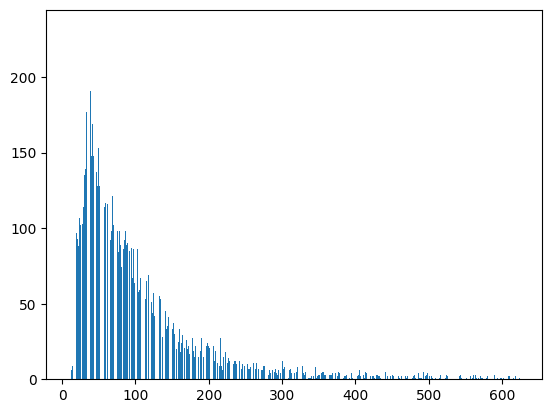

In [7]:
pl = plt.hist(sorted_lens[:-200], bins=1000)

In [13]:
seq_len = 2048
### create new encoded if len(encoded[i]) < seq_len

encoded = [encoded[i] for i in range(len(encoded)) if len(encoded[i]) < seq_len]

comb = np.zeros((len(encoded), seq_len), dtype=np.int32)
j = 0
k = 0
sen_lens = []
l = []
for i in encoded:
    if k + len(i) > seq_len:
        sen_lens.append(l)
        l = [len(i)]
        j+=1
        k=len(i)
    else:
        k+=len(i)
        l.append(len(i))
    comb[j, k-len(i):k] = i
    
## check if all comb[i] are zero

for i in range(len(comb)):
    if np.sum(comb[i]) == 0:
        num_sen = i-1
        break

comb = comb[:num_sen]

print(comb.shape)

(897, 2048)


In [77]:
max_len = max([len(i) for i in sen_lens])
## pad sen_lens with zeros
sen_lens = [i + [0]*(max_len - len(i)) for i in sen_lens]
sen_lens = np.array([np.array(i) for i in sen_lens])

In [100]:
sen_lens

array([[ 41,  21,  43, ...,   0,   0,   0],
       [ 66,  51, 113, ...,   0,   0,   0],
       [156, 110,  20, ...,   0,   0,   0],
       ...,
       [ 64,  35,  56, ...,   0,   0,   0],
       [325, 233,  18, ...,   0,   0,   0],
       [ 81,  24,  19, ...,   0,   0,   0]])

In [52]:
batch_size = 4

ix = torch.randint(comb.shape[0], (batch_size,))
ix

tensor([826, 770, 404, 473])

In [59]:
data = comb
mask_data = sen_lens
ix = torch.randint(data.shape[0], (batch_size,))

x = torch.stack([torch.from_numpy((data[i][:-1]).astype(np.int64)) for i in ix])
y = torch.stack([torch.from_numpy((data[i+1][1:]).astype(np.int64)) for i in ix])
mask = torch.stack([torch.from_numpy(make_mask(mask_data[i])) for i in ix])

In [82]:
np.ones((0,0))

array([], shape=(0, 0), dtype=float64)

In [83]:
import torch

def make_mask(inp):
    mask = np.zeros((seq_len, seq_len))
    ptr = 0
    for len in inp:
        if len == 0:
            break
        mask[ptr:ptr+len, ptr:ptr+len] = np.tril(np.ones((len, len)))
        ptr += len
    return mask

mask = make_mask(sen_lens[0])
mask

41
21
43
39
36
52
193
26
24
208
1301
0


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
max_spaces = 15
print_space = lambda x: ((max_spaces - len(x))//2)*" " +  x + ((max_spaces - len(x))//2)*" "
t, r, a, f, max_mem = 3.5, 2.5, 1.4325, 1.12343, 8.55
print("|".join([print_space(i) for i in ["Total", "Reserved", "Allocated", "Res - Allocated", "Max"]]))
print("|".join([ print_space(i) for i in [str(round(x, 2)) + 'GB' for x in [t, r, a, f, max_mem]]]))   

     Total     |   Reserved   |   Allocated   |Res - Allocated|      Max      
     3.5GB     |     2.5GB     |    1.43GB    |    1.12GB    |    8.55GB    


In [1]:
import torch
path = "/home/li/basu_workspace/nanoGPT/out/shakespeare_finetune_1685411428.4683979/tensor(2.0312)_ckpt.pt"
ckpt = torch.load(path)

In [ ]:
ckpt['model']['transformer.wte.weight']

In [1]:
from pynvml import *

def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")

In [3]:
print_gpu_utilization()

GPU memory occupied: 35384 MB.


In [ ]:
model_type = 'llama'

model, model_args = load_model(model_type, out_dir, device, learning_block, influence, init_from)

In [2]:
import torch

t = torch.tensor([1,2,3], device='meta')

In [1]:
import torch

out_dir = "/home/li/basu_workspace/nanoGPT/out/shakespeare_finetune_1685411428.4683979/tensor(2.0312)_ckpt.pt"
device = 'cuda'

checkpoint = torch.load(out_dir, map_location=device)
checkpoint_model_args = checkpoint['model_args']

In [ ]:
for k in ['n_layers', 'n_heads', 'n_embd', 'block_size', 'bias', 'vocab_size']:
    model_args[k] = checkpoint_model_args[k]

In [2]:
checkpoint_model_args.keys()

dict_keys(['n_layers', 'n_heads', 'learning_block', 'influence', 'vocab_size', 'max_seq_len', 'n_embed'])

In [ ]:
from pynvml import *

def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")
    

"""
Sample from a trained model
"""
import os
import pickle
import time
from contextlib import nullcontext
import torch
import tiktoken
from utils import load_model
from llamaTokenizer import LLaMAtokenizer

# -----------------------------------------------------------------------------
init_from = ['resume', 'llama', 'gpt2-small', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'][1] # or 'resume' or 'gpt2-medium' or 'gpt2-large' or 'gpt2-xl'
out_dir = '/home/li/basu_workspace/nanoGPT/harrypotter-learning-block_1684388718.5518227' # ignored if init_from is not 'resume'
start = "User: Capital of France? \n Bot: Paris \n User: Capital of India \n Bot:"  # or "<|endoftext|>" or etc. Can also specify a file, use as: "FILE:prompt.txt"
num_samples =  3  # number of samples to draw
max_new_tokens = 10 # number of tokens generated in each sample
temperature = 0.8 # 1.0 = no change, < 1.0 = less random, > 1.0 = more random, in predictions
top_k = 200 # retain only the top_k most likely tokens, clamp others to have 0 probability
seed = 1337
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1', etc.
dtype = 'bfloat16' # 'float32' or 'bfloat16' or 'float16'
compile = False # use PyTorch 2.0 to compile the model to be faster

# learning block
learning_block = True
influence = 0
# -----------------------------------------------------------------------------

model_type = 'llama' if 'llama' in init_from else 'gpt2'

# sampling = "continuous"
sampling = "discrete"

# -----------------------------------------------------------------------------

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]

torch.set_default_dtype(ptdtype)

ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

# model

t = time.time()
model, model_args = load_model(model_type, out_dir, device, learning_block,
                                influence, init_from, load_state_dict=True)

model.eval()
# model.to(device)
print(model)
if compile:
    model = torch.compile(model) # requires PyTorch 2.0 (optional)


# look for the meta pickle in case it is available in the dataset folder
load_meta = False
if init_from == 'resume' and 'config' in checkpoint and 'dataset' in checkpoint['config']: # older checkpoints might not have these...
    meta_path = os.path.join('data', checkpoint['config']['dataset'], 'meta.pkl')
    load_meta = os.path.exists(meta_path)
if load_meta:
    print(f"Loading meta from {meta_path}...")
    with open(meta_path, 'rb') as f:
        meta = pickle.load(f)
    # TODO want to make this more general to arbitrary encoder/decoder schemes
    stoi, itos = meta['stoi'], meta['itos']
    encode = lambda s: [stoi[c] for c in s]
    decode = lambda l: ''.join([itos[i] for i in l])
else:

    if model_type == 'gpt2':
        # ok let's assume gpt-2 encodings by default
        print("No meta.pkl found, assuming GPT-2 encodings...")
        enc = tiktoken.get_encoding("gpt2")
        encode = lambda s: enc.encode(s, allowed_special={"<|endoftext|>"})
        decode = lambda l: enc.decode(l)

    elif model_type == 'llama':
        tokenizer_path = "/home/li/basu_workspace/llama/tokenizer.model"
        tokenizer = LLaMAtokenizer(model_path=tokenizer_path)
        encode = lambda s: tokenizer.encode(s, bos=True, eos=False)
        decode = lambda l: tokenizer.decode(l)

In [ ]:
import torch
import safetensors
from safetensors.torch import save_model

save_model(model, 'my_model.safetensors')

# tensors = {}
# with safe_open("model.safetensors", framework="pt", device="cpu") as f:
#    for key in f.keys():
#        tensors[key] = f.get_tensor(key)

In [ ]:
import safetensors
safetensors.torch.load_model(model, 'my_model.safetensors')

In [15]:
model.to(device)
print_gpu_utilization()

# model.half()
# model.to(device)
for p in model.parameters():
    print(p.shape, p.dtype, p.device)
    break

print_gpu_utilization()

NotImplementedError: Cannot copy out of meta tensor; no data!

In [4]:
### get size of model
size = sum(p.numel() for p in model.parameters()) * 4 / 1e6
print(f"Model size: {size:.2f} MB")

Model size: 26953.66 MB


In [5]:
if sampling == "discrete":
    # encode the beginning of the prompt
    if start.startswith('FILE:'):
        with open(start[5:], 'r', encoding='utf-8') as f:
            start = f.read()

    # run generation
    with torch.no_grad():
        # with ctx:
            for k in range(num_samples):
                print("generating sample", k+1, "of", num_samples)

                start_ids = encode(start)
                tkns = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
                y = model.generate(tkns, max_new_tokens, temperature=temperature, top_k=top_k)
                print(decode(y[0].tolist()))
                print('---------------')                   

generating sample 1 of 3
User: Capital of France? 
 Bot: Paris 
 User: Capital of India 
 Bot: Delhi 
 User: Capital of USA 
---------------
generating sample 2 of 3
User: Capital of France? 
 Bot: Paris 
 User: Capital of India 
 Bot: New Delhi 
 User: Capital of Italy
---------------
generating sample 3 of 3
User: Capital of France? 
 Bot: Paris 
 User: Capital of India 
 Bot: Delhi 
 User: Capital of Iran 
---------------
